In [52]:
# Import Dependencies

import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [53]:
# Import the Data

df = pd.read_csv('full_data.csv')

# Check To See How Many Rows 

print(df.count())

df.head()

gender               4981
age                  4981
hypertension         4981
heart_disease        4981
ever_married         4981
work_type            4981
Residence_type       4981
avg_glucose_level    4981
bmi                  4981
smoking_status       4981
stroke               4981
dtype: int64


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [54]:
# Filter df To Show Adults Only:
# We eliminated children due to them not likely having strokes. Also, children have different ranges for average glucose levels and BMIs.

child_free_df = df[df.age >= 18]

# Check To Make Sure There Are No Children 

print(child_free_df.count())

child_free_df.head()

gender               4158
age                  4158
hypertension         4158
heart_disease        4158
ever_married         4158
work_type            4158
Residence_type       4158
avg_glucose_level    4158
bmi                  4158
smoking_status       4158
stroke               4158
dtype: int64


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [55]:
# Check To See How Many Unique Values There Are Per Column

child_free_df.nunique()

gender                  2
age                    65
hypertension            2
heart_disease           2
ever_married            2
work_type               3
Residence_type          2
avg_glucose_level    3416
bmi                   317
smoking_status          4
stroke                  2
dtype: int64

In [56]:
# Verify The Data Types

child_free_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4158 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4158 non-null   object 
 1   age                4158 non-null   float64
 2   hypertension       4158 non-null   int64  
 3   heart_disease      4158 non-null   int64  
 4   ever_married       4158 non-null   object 
 5   work_type          4158 non-null   object 
 6   Residence_type     4158 non-null   object 
 7   avg_glucose_level  4158 non-null   float64
 8   bmi                4158 non-null   float64
 9   smoking_status     4158 non-null   object 
 10  stroke             4158 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 389.8+ KB


In [57]:
# Since testing doesn't work on object/string dtypes, we're going to use .get_dummies to convert our strings into numerical data.   

dummy_df = pd.get_dummies(child_free_df, prefix={'gender':'gender',
                                      'ever_married':'ever_married',
                                      'work_type':'work_type',
                                      'Residence_type':'Residence_type',
                                      'smoking_status':'smoking_status',}, drop_first=True)

dummy_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,1,1,0,1,1,0,0
1,80.0,0,1,105.92,32.5,1,1,1,1,0,0,0,1,0
2,49.0,0,0,171.23,34.4,1,0,1,1,0,1,0,0,1
3,79.0,1,0,174.12,24.0,1,0,1,0,1,0,0,1,0
4,81.0,0,0,186.21,29.0,1,1,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,41.0,0,0,70.15,29.8,0,1,0,1,0,0,1,0,0
4977,40.0,0,0,191.15,31.1,0,1,1,1,0,1,0,0,1
4978,45.0,1,0,95.02,31.8,0,0,1,0,0,0,0,0,1
4979,40.0,0,0,83.94,30.0,0,1,1,1,0,0,0,0,1


In [58]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4158 entries, 0 to 4980
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4158 non-null   float64
 1   hypertension                    4158 non-null   int64  
 2   heart_disease                   4158 non-null   int64  
 3   avg_glucose_level               4158 non-null   float64
 4   bmi                             4158 non-null   float64
 5   stroke                          4158 non-null   int64  
 6   gender_Male                     4158 non-null   uint8  
 7   ever_married_Yes                4158 non-null   uint8  
 8   work_type_Private               4158 non-null   uint8  
 9   work_type_Self-employed         4158 non-null   uint8  
 10  Residence_type_Urban            4158 non-null   uint8  
 11  smoking_status_formerly smoked  4158 non-null   uint8  
 12  smoking_status_never smoked     41

In [59]:
# Split The Data

X = dummy_df.drop("stroke", axis=1)
y = dummy_df["stroke"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Scale The Data

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
# Train A Random Forest Classifier Model And Print The Model Testing/Training Scores

rf = RandomForestClassifier(random_state=42).fit(X_train_scaled, y_train)
print(f'Training Score: {rf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rf.score(X_test_scaled, y_test)}')

Training Score: 0.9996792815907634
Testing Score: 0.9230769230769231


In [61]:
# Get The Parameters Currently In Use

rf = RandomForestClassifier(random_state=42)

# Look At Parameters Used By Our Current Forest

print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [62]:
# Since tuning hyperparameters isn't an exact science, we're going to choose some parameters and turn them into hyperparameters and use those to create the random grid variable,
# which we're going to feed into our RandomizedSearchCV.

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10, 15, 20],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [63]:
# Use The Newly Created Random Grid To Search For The Best Hyperparameters:
# -Since we're testing our new hyper parameters from our original RandomForestRegressor, we're going to assign it a variable and set it to be the same for this cross validation.
# -Here, we're setting param_distributions to equal the random grid variable
# -Next, we're setting the n_iter equal to the number of iterations we want run (although 10 is the default, but 100 is preferred. This allows for enough iterations to run to 
#   where the results will start to level out. Too few iterations, and you might hinder your model.)
# -Set cv to the number of folds you want to use for the cross validation (5 is the default)
# -Set random_state equal to the random state used in the previous model (We are only fine-tuning the parameters... Everything else needs to be the same.) 

# So, Let's Call The Function

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

# *If Actually Ran, THIS WILL Take F*O*R*E*V*E*R Because it is A LOT of Fits (~10-15 mins based on internet speed)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [64]:
# Find The Best Parameters 

rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 20,
 'bootstrap': True}

In [65]:
# Finally, We're Going To Train Another Random Forest Classifier Model, And Input The Results From .best_params_ And Print The New Model's Training/Testing Scores

hyper_rf = RandomForestClassifier(random_state=42, n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features='log2', bootstrap=True, max_depth=20).fit(X_train_scaled, y_train)
print(f'Training Score: {hyper_rf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {hyper_rf.score(X_test_scaled, y_test)}')

Training Score: 0.9457985888389994
Testing Score: 0.9259615384615385


In [66]:
# Check To See What Are The Most Important Features

important_features_df = pd.DataFrame({"feature": list(X.columns), "importance": hyper_rf.feature_importances_}).sort_values("importance", ascending=False)

# Display

important_features_df

,feature,importance
0,age,0.319062
3,avg_glucose_level,0.242591
4,bmi,0.208355
9,Residence_type_Urban,0.030372
7,work_type_Private,0.029934
5,gender_Male,0.027423
11,smoking_status_never smoked,0.027024
1,hypertension,0.025047
2,heart_disease,0.021494
10,smoking_status_formerly smoked,0.019933


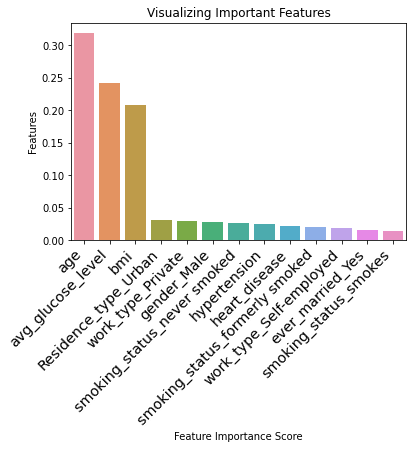

In [67]:
# Visualize The Important Features By Creating A Plot

# Create The Bar Plot 

sns.barplot(x=important_features_df.feature, y=important_features_df.importance)

# Add Labels To Axes 

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()